In [10]:
def QML_Regression(Dataset, Features, Target):
    
    from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2
    from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
    from qiskit.primitives import Sampler
    import time
    from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
    from sklearn.model_selection import train_test_split
    from qiskit_algorithms.utils import algorithm_globals
    from sklearn.preprocessing import MinMaxScaler
    from matplotlib import pyplot as plt
    from IPython.display import clear_output
    import numpy

    
    features = Features  # this need to be properly defined, if your data is not in data and label form split 
    labels = Target  # it into arrays change this features and label to make it two diff arrays
    features = MinMaxScaler().fit_transform(features)
    
    algorithm_globals.random_seed = numpy.random.randint(1,100)
    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, train_size=0.7, random_state=algorithm_globals.random_seed
    )

    num_features = features.shape[1]

    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
    feature_map.decompose()
    
    
    ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
    ansatz.decompose()
    
    
    optimizer = L_BFGS_B(maxiter=30)
        
    objective_func_vals = []
    plt.rcParams["figure.figsize"] = (12, 6)
    
    def callback_graph(weights, obj_func):
        clear_output(wait=True)
        objective_func_vals.append(obj_func)
        plt.title("Objective function value against iteration")
        plt.xlabel("Iteration")
        plt.ylabel("Objective function value")
        plt.plot(range(len(objective_func_vals)), objective_func_vals)
        plt.show()
        
    vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
    )
    
    objective_func_vals = []
    start = time.time()
    vqr.fit(train_features, train_labels)
    elapsed = time.time() - start
    
    print(f"Training time: {round(elapsed)} seconds")
    
    train_score = vqr.score(train_features, train_labels)
    test_score = vqr.score(test_features, test_labels)
    from sklearn.metrics import mean_squared_error, r2_score
    
    pred_train_features = vqr.predict(train_features)
    pred_test_features = vqr.predict(test_features)
    
    values=[]
    for i in range(len(test_features)):
        values.append(i+2)
        

    train_mse = mean_squared_error(train_labels, pred_train_features)
    test_mse = mean_squared_error(test_labels, pred_test_features)
    train_r2 = r2_score(train_labels, pred_train_features)
    test_r2 = r2_score(test_labels, pred_test_features)
    
    from sklearn import metrics
    #confusion_matrix = metrics.confusion_matrix(train_labels, pred_train_features)
    #cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    
    print("algorithm_globals.random seed =", algorithm_globals.random_seed)
    print("Train Score = ",train_score) 
    print("Test Score = ",test_score)
    #print("Train Mean Squared Error = ",train_mse) 
    #print("Test Mean Squared Error = ",test_mse)
    #print("Train r2 Score = ",train_r2) 
    #print("Test r2 Score = ",test_r2)

    #cm_display.plot()
    display(feature_map.decompose().draw('mpl'))
    display(ansatz.decompose().draw('mpl'))
    
    plt.plot(values, test_labels, "bo") 
    plt.plot(values, pred_test_features, "go") 
    
    plt.show()

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
house = pd.read_csv('Housing.csv')
"""house = house.drop('guestroom', axis=1)
house = house.drop('hotwaterheating', axis=1)
house = house.drop('prefarea', axis=1)
house = house.drop('basement', axis=1)
house = house.drop('mainroad', axis=1)
house = house.drop('parking', axis=1)
house = house.drop('airconditioning', axis=1)
house = house.drop('furnishingstatus', axis=1)
house = house.drop('bathrooms', axis=1)
"""
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
house['airconditioning'] = house['airconditioning'].map({'yes': 1, 'no': 0})
house['mainroad'] = house['mainroad'].map({'yes': 1, 'no': 0})
house['guestroom'] = house['guestroom'].map({'yes': 1, 'no': 0})
house['basement'] = house['basement'].map({'yes': 1, 'no': 0})
house['hotwaterheating'] = house['hotwaterheating'].map({'yes': 1, 'no': 0})
house['prefarea'] = house['prefarea'].map({'yes': 1, 'no': 0})
house['furnishingstatus'] = house['furnishingstatus'].map({'furnished': 2, 'unfurnished': 0, 'semi-furnished': 1})
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [5]:
data = house.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].values
target_price = house.iloc[:, 0].values

Dict = {'data' : data, 'target_price' : target_price}

Features = Dict['data']

Target = Dict['target_price']  # This is                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     only for Regression

#Dict
print(house.corr())

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

In [7]:
QML_Regression(Dict, Features, Target)

NameError: name 'QML_Regression' is not defined

In [1]:
def QML_Reg(Dataset, Features, Target):
    
    from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2
    from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
    from qiskit.primitives import Sampler
    import time
    from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
    from sklearn.model_selection import train_test_split
    from qiskit_algorithms.utils import algorithm_globals
    from sklearn.preprocessing import MinMaxScaler
    from matplotlib import pyplot as plt
    from IPython.display import clear_output
    import numpy

    
    features = Features  # this need to be properly defined, if your data is not in data and label form split 
    labels = Target  # it into arrays change this features and label to make it two diff arrays
    #features = MinMaxScaler().fit_transform(features)
    
    algorithm_globals.random_seed = numpy.random.randint(1,100)
    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, train_size=0.7, random_state=algorithm_globals.random_seed
    )

    num_features = features.shape[1]

    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
    feature_map.decompose()
    
    def Ansatz_housing(num_features):
        ansatz_custom = QuantumCircuit(num_features)
        j = 0
        for i in range(num_features):
            ansatz_custom.ry(Parameter('θ_' +str(j)), i)
            j += 1
            ansatz_custom.rz(Parameter('θ_' +str(j)), i)
            j += 1
        ansatz_custom.barrier()
        
        ansatz_custom.cx(0,1)
        ansatz_custom.cx(0,3)
        ansatz_custom.cx(0,4)
        ansatz_custom.cx(0,9)
        ansatz_custom.cx(0,10)
        ansatz_custom.cx(2,4)
        ansatz_custom.cx(2,3)
        ansatz_custom.cx(7,6)
        ansatz_custom.barrier()
        
        for i in range(num_features):
            ansatz_custom.ry(Parameter('θ_' +str(j)), i)
            j += 1
            ansatz_custom.rz(Parameter('θ_' +str(j)), i)
            j += 1
        return ansatz_custom 
    
    ansatz = Ansatz_housing(num_features) #RealAmplitudes(num_qubits=num_features, reps=2)
    #ansatz.decompose()

    
    
    optimizer = L_BFGS_B(maxiter=30)
        
    objective_func_vals = []
    plt.rcParams["figure.figsize"] = (12, 6)
    
    def callback_graph(weights, obj_func):
        clear_output(wait=True)
        objective_func_vals.append(obj_func)
        plt.title("Objective function value against iteration")
        plt.xlabel("Iteration")
        plt.ylabel("Objective function value")
        plt.plot(range(len(objective_func_vals)), objective_func_vals)
        plt.show()
        
    vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
    )
    
    objective_func_vals = []
    start = time.time()
    vqr.fit(train_features, train_labels)
    elapsed = time.time() - start
    
    print(f"Training time: {round(elapsed)} seconds")
    
    train_score = vqr.score(train_features, train_labels)
    test_score = vqr.score(test_features, test_labels)
    from sklearn.metrics import mean_squared_error, r2_score
    
    pred_train_features = vqr.predict(train_features)
    pred_test_features = vqr.predict(test_features)
    
    values=[]
    for i in range(len(test_features)):
        values.append(i+2)
        

    train_mse = mean_squared_error(train_labels, pred_train_features)
    test_mse = mean_squared_error(test_labels, pred_test_features)
    train_r2 = r2_score(train_labels, pred_train_features)
    test_r2 = r2_score(test_labels, pred_test_features)
    
    from sklearn import metrics
    #confusion_matrix = metrics.confusion_matrix(train_labels, pred_train_features)
    #cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    
    print("algorithm_globals.random seed =", algorithm_globals.random_seed)
    print("Train Score = ",train_score) 
    print("Test Score = ",test_score)
    #print("Train Mean Squared Error = ",train_mse) 
    #print("Test Mean Squared Error = ",test_mse)
    #print("Train r2 Score = ",train_r2) 
    #print("Test r2 Score = ",test_r2)

    #cm_display.plot()
    display(feature_map.decompose().draw('mpl'))
    display(ansatz.decompose().draw('mpl'))
    
    plt.plot(values, test_labels, "bo") 
    plt.plot(values, pred_test_features, "go") 
    
    plt.show()
    #print(vqr.predict([[5521, 4, 1],[4500, 2, 1]]))

In [5]:
import qiskit
help('qiskit_algorithms.optimizers')

Help on package qiskit_algorithms.optimizers in qiskit_algorithms:

NAME
    qiskit_algorithms.optimizers

DESCRIPTION
    Optimizers (:mod:`qiskit_algorithms.optimizers`)
    Classical Optimizers.
    
    This package contains a variety of classical optimizers and were designed for use by
    qiskit_algorithm's quantum variational algorithms, such as :class:`~qiskit_algorithms.VQE`.
    Logically, these optimizers can be divided into two categories:
    
    `Local Optimizers`_
      Given an optimization problem, a **local optimizer** is a function
      that attempts to find an optimal value within the neighboring set of a candidate solution.
    
    `Global Optimizers`_
      Given an optimization problem, a **global optimizer** is a function
      that attempts to find an optimal value among all possible solutions.
    
    .. currentmodule:: qiskit_algorithms.optimizers
    
    Optimizer Base Classes
    ----------------------
    
    .. autosummary::
       :toctree: ../stub

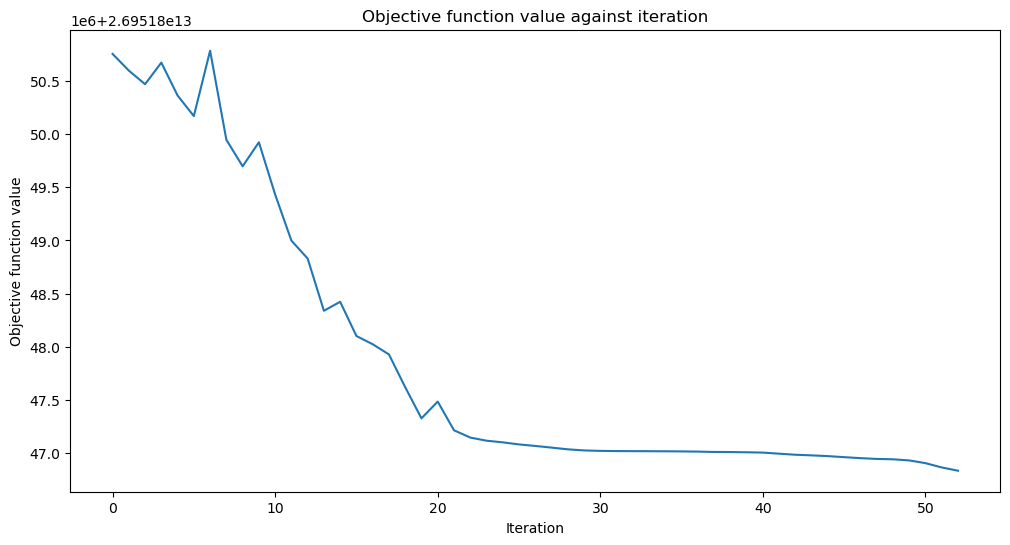

In [ ]:
QML_Reg(Dict, Features, Target)

In [6]:
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

In [14]:
model = GradientBoostingRegressor()
Features = MinMaxScaler().fit_transform(Features)
train_features, test_features, train_labels, test_labels = train_test_split(
        Features, Target, train_size=0.7)
model.fit(train_features, train_labels)
model.score(train_features, train_labels)

0.8806054401686505

In [15]:
print(model.predict([[6231, 3, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1], [9256, 4, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0], [4006, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1], [7150, 4, 2, 3, 0, 1, 0, 1, 1, 2, 0, 2]]))

[10103415.805656    9842086.6168797  10277160.81898271 10103415.805656  ]


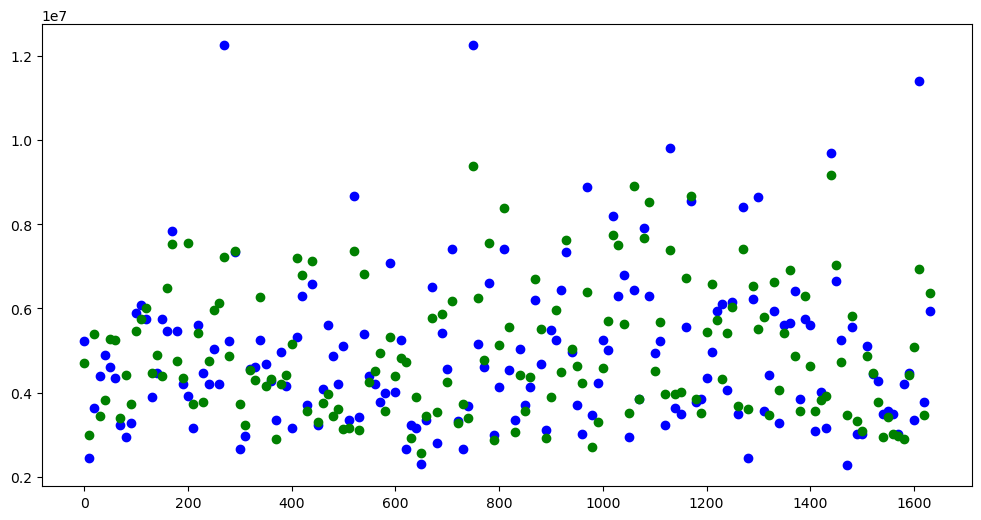

In [17]:
plt.rcParams["figure.figsize"] = (12, 6)
values=[]
for i in range(len(test_features)):
        values.append(i*10)

pred_test_features = model.predict(test_features)       
plt.plot(values, test_labels, "bo") 
plt.plot(values, pred_test_features, "go") 
    
plt.show()